# Image Operations

**Task**: perform broadcast and reduction operations on a tensor representing a batch of color images

**Goal**: The goal of this exercise was just to get used to thinking about shapes of multidimensional structures. A surprisingly large amount of the thinking that goes into implementing neural net code is getting the shapes right. I didn’t really believe that until I had to figure it out myself a couple of times, and that convinced me that everyone could use some guided practice with that.

# Setup

As usual, you don't need to understand the code in this section.

In [2]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
# But "Grays" is inverted, so we use "gray" instead.
matplotlib.rc('image', cmap='gray')

Download dataset.

In [3]:
path = untar_data(URLs.PETS) / "images"

Make a stable order for the images: first sort, then randomize using a known seed.

In [4]:
set_seed(333)
image_files = get_image_files(path).sorted().shuffle()

Define how we're going to split the data into a training and validation set.

In [5]:
splitter = RandomSplitter(valid_pct=0.2, seed=42)

In this dataset, cat breeds start with a capital letter, so we can get the label from the filename.

In [6]:
def cat_or_dog(x):
    return 'cat' if x[0].isupper() else 'dog'

def get_y(file_path):
    return cat_or_dog(file_path.name)

Define a standard image-classification `DataBlock`.

In [7]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_y     = get_y,
                   splitter  = splitter,
                   item_tfms = Resize(224))

Override `shuffle_fn` so that the images never actually get shuffled (batch order is consistent).

In [8]:
dataloaders = dblock.dataloaders(image_files, batch_size=9, shuffle_fn=lambda idxs: idxs)

Since we set the `shuffle_fn` to the identity above, the images will always get loaded in the same order, so the first batch will always be the same:

In [9]:
batch = dataloaders.train.one_batch()
images_orig, labels = batch
images = images_orig.clone() # make a copy that we can modify later.

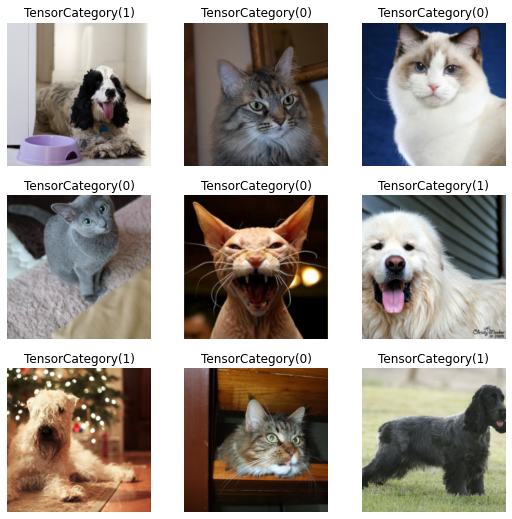

In [10]:
show_image_batch((images, labels))

# Task

Note: *all of these operations are one-liners*. If you find yourself writing lots of code, pause and think more (or ask for help).

1. **Evaluate `images.shape`**. What does each number represent?

In [11]:
images.shape

torch.Size([9, 3, 224, 224])

The first number is the amount of images, the second number is the amount per row, and the last two are the length and width of each image.

2. **Evaluate `labels`**. Explain those numbers, with the help of `dataloaders.train.vocab`.

In [12]:
labels

TensorCategory([1, 0, 0, 0, 0, 1, 1, 0, 1], device='cuda:0')

In [13]:
dataloaders.train.vocab

['cat', 'dog']

each image has a label, 1 for dog and 0 for cat.

3. **Show the first image in the batch.** (Use `show_image`.)

<AxesSubplot:>

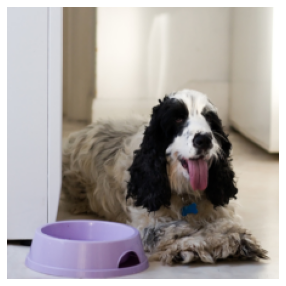

In [14]:
show_image(images[0])

4. **Show the average image.** Hint: you can compute this by taking the `.mean(axis=___)`; think about what the blank is.

<AxesSubplot:>

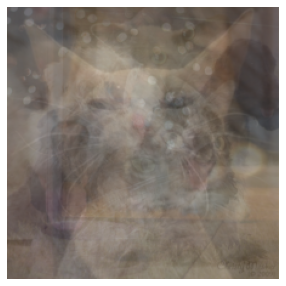

In [15]:
show_image(images.mean(axis=0))

5. Show the average of the **middle 3 images.**

You'll need to use *slicing* to compute this.

<AxesSubplot:>

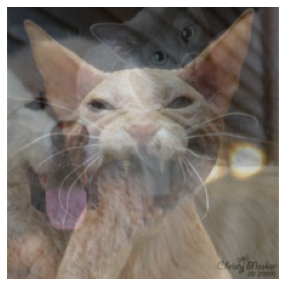

In [56]:
middleImages = images[3:6]
show_image(middleImages.mean(axis=0))

6. **Show the grayscale version of all of the images.**

- *Do this by making minimal changes to the previous exercise; do not import anything new.*
- For simplicity, just use an equal weighting of the red, green, and blue channels, i.e., take the `mean` across channels.
- You can use `show_images` to show all of the images.

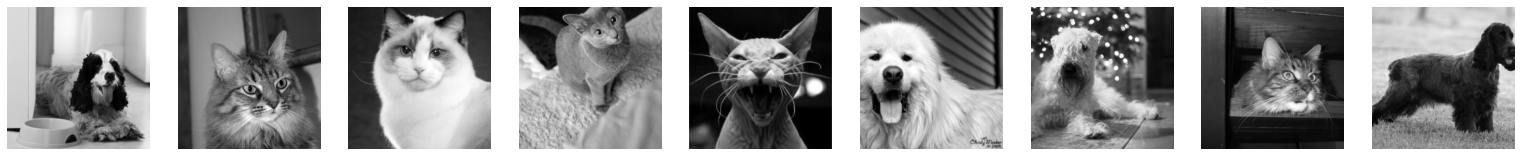

In [16]:
show_images(images.mean(axis=1))

7. **Invert the color of the images** (e.g., black becomes white). Show the result.

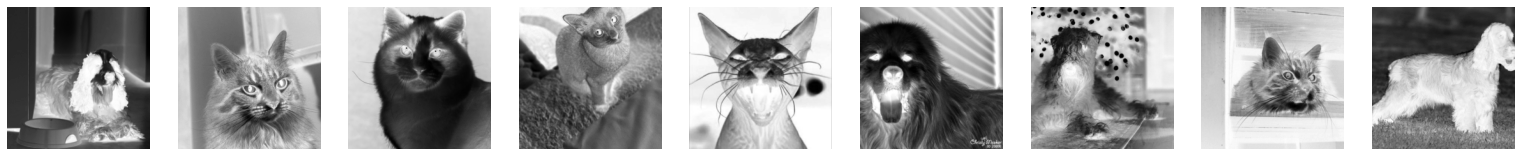

In [62]:
show_images(-images.mean(axis=1))

## Second Set of Tasks

These are a bit more involved; you might need two or three lines of code.

The next exercise will require you to **assign to slices**. It wil also require you to "skip" dimensions in slicing. To prepare, study what this does:

In [17]:
images.shape

torch.Size([9, 3, 224, 224])

Consider slicing on the first dimension

In [18]:
images[:, 0].shape

torch.Size([9, 224, 224])

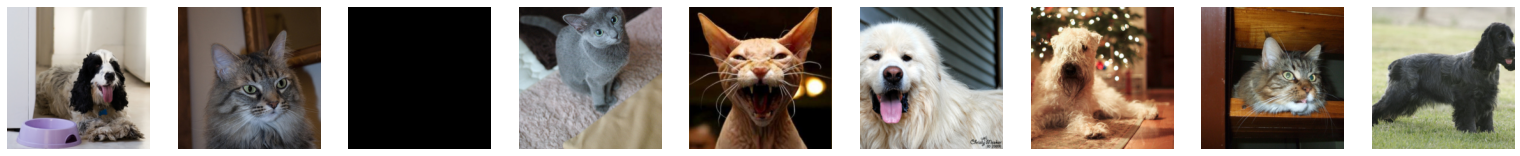

In [67]:
# assign to first dimension. The following three lines are equivalent in this case:
images[2] = 0.0
images[2] = torch.zeros(3, 224, 224)
images[2, :, :, :] = 0.0
show_images(images)
images = images_orig.clone() # restore the original images

Now we slice along the second dimension:

In [19]:
images[:, 0].shape

torch.Size([9, 224, 224])

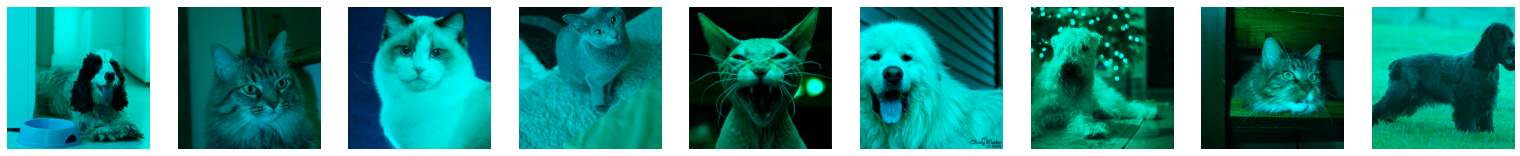

In [20]:
images[:, 0] = 0.0
show_images(images)
images = images_orig.clone() # restore the original images

In [69]:
images[:, :, 0, 0] = 0.0
print(images[0, 0, 0, 0], images[5, 1, 0, 0], images[0, 0, 5, 1])
images = images_orig.clone() # restore the original images

TensorImage(0., device='cuda:0') TensorImage(0., device='cuda:0') TensorImage(0., device='cuda:0')


8. **Black out (set to 0) the top 75 pixels of each image, then grey out (set to 0.5) the right 50 pixels of each image.**

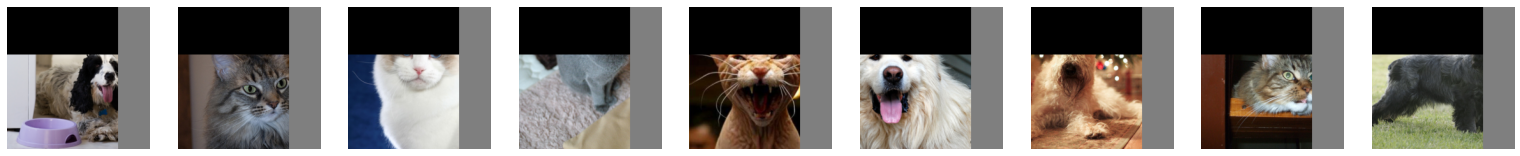

In [70]:
images[:, :, 0:76] = 0.0
images[:, :, :, -50:] = 0.5
show_images(images)

In [71]:
# restore the original images for the next step
images = images_orig.clone()

9. **Show only the red color channel** by zeroing out the green and blue channels.

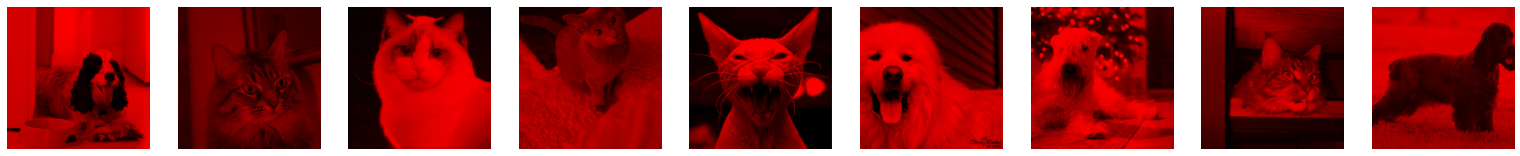

In [72]:
images[:, 1:3] = 0.0
show_images(images)
images = images_orig.clone() # restore the original images